# Preprocessing Testing

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing


DATA_PATH = 'data/'

def load_vehicle_data(vehicles_path='data'):
  csv_path = os.path.join(vehicles_path, "project_data.csv")
  return pd.read_csv(csv_path)


def remove_vehicle_data_noise(vehicles):
  # Removing outlier vehicle prices that are dramatically outside standard deviation
  vehicles.drop(vehicles[vehicles['selling_price'] >= 1650000].index, inplace = True)

  # Removing vehicles older than 2000 due to sparse inconsistent data
  vehicles.drop(vehicles[vehicles['year'] < int("2000")].index, inplace = True)

  # Removing sparse high mileage vehicles
  vehicles.drop(vehicles[vehicles['km_driven'] >= 240000].index, inplace = True)

  # Removing 'Test Drive Car' instances since it's NOT numerically related to other owner types
  # AND NOT BEING USED FOR ONE HOT ENCODING
  vehicles.drop(vehicles[vehicles['owner'] == 'Test Drive Car'].index, inplace = True)

  # Remove 'Electric' 'fuel' type since only 1 instance
  vehicles.drop(vehicles[vehicles['fuel'] == 'Electric'].index, inplace = True)
  

def convert_categories_to_integers(vehicles):
  # Creating numerical value for number of owner strings
  current_owner_strings = ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']
  new_owner_strings = ['1', '2', '3', '4']
  vehicles['owner'] = vehicles['owner'].replace(current_owner_strings, new_owner_strings)
  vehicles['owner'] = vehicles['owner'].astype('int64') # Convert type to integers:

  # 0-indexing to convert category column's to be one hot encoded 
  current_owner_strings = ['Petrol', 'Diesel', 'CNG', 'LPG']
  new_strings = ['0', '1', '2', '3']
  vehicles['fuel'] = vehicles['fuel'].replace(current_owner_strings, new_strings)
  vehicles['fuel'] = vehicles['fuel'].astype('int64')

  current_owner_strings = ['Individual', 'Dealer', 'Trustmark Dealer']
  new_strings = ['0', '1', '2']
  vehicles['seller_type'] = vehicles['seller_type'].replace(current_owner_strings, new_strings)
  vehicles['seller_type'] = vehicles['seller_type'].astype('int64')

  current_owner_strings = ['Manual', 'Automatic']
  new_strings = ['0', '1']
  vehicles['transmission'] = vehicles['transmission'].replace(current_owner_strings, new_strings)
  vehicles['transmission'] = vehicles['transmission'].astype('int64')


def load_preprocessed_data():
  

  remove_vehicle_data_noise(vehicles)

  convert_categories_to_integers(vehicles)

  return vehicles


In [3]:
vehicles = load_vehicle_data()
vehicles.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Removing Noise and converting Categories to Integers

In [4]:
remove_vehicle_data_noise(vehicles)

convert_categories_to_integers(vehicles)
vehicles.head()

selling_price    1.000000
year             0.413922
km_driven       -0.192289
Name: selling_price, dtype: float64

array([[<AxesSubplot:xlabel='selling_price', ylabel='selling_price'>,
        <AxesSubplot:xlabel='year', ylabel='selling_price'>,
        <AxesSubplot:xlabel='km_driven', ylabel='selling_price'>],
       [<AxesSubplot:xlabel='selling_price', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='km_driven', ylabel='year'>],
       [<AxesSubplot:xlabel='selling_price', ylabel='km_driven'>,
        <AxesSubplot:xlabel='year', ylabel='km_driven'>,
        <AxesSubplot:xlabel='km_driven', ylabel='km_driven'>]],
      dtype=object)

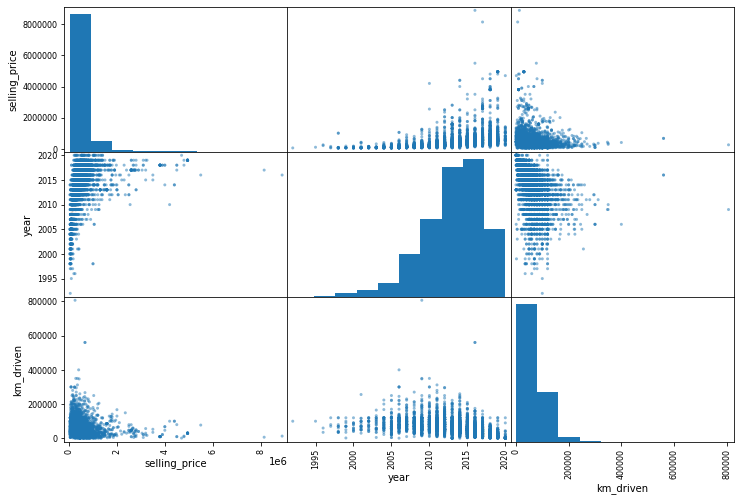

In [5]:
from pandas.plotting import scatter_matrix

attributes = ["selling_price", "year", "km_driven"]
scatter_matrix(vehicles[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

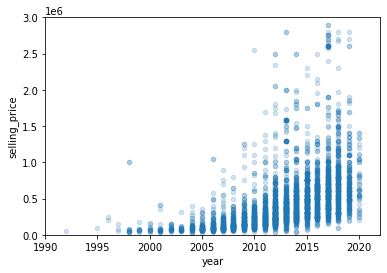

In [154]:
vehicles.plot(kind="scatter", x="year", y="selling_price",
             alpha=0.2)
plt.axis([1990, 2022, 0, 3000000])
plt.show()

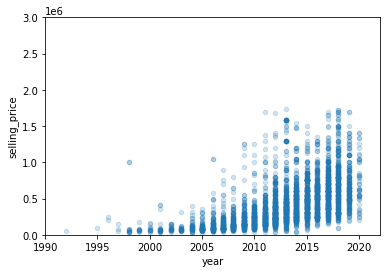

In [155]:
# Removing 'noise' aka instances that have a price greater than  1,750,000
# NOTE This applies to all data moving forward
vehicles.drop(vehicles[vehicles['selling_price'] >= 1750000].index, inplace = True)

vehicles.plot(kind="scatter", x="year", y="selling_price",
             alpha=0.2)
plt.axis([1990, 2022, 0, 3000000])
plt.show()

## Standardize Numerical Attributes

In [6]:
vehicles['owner'].value_counts()

First Owner             2716
Second Owner            1096
Third Owner              302
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [157]:
# Note these values are not actually integers
print('Actual data type = ', type(vehicles['owner'][0]))

Actual data type =  <class 'str'>


In [158]:
current_owner_strings = ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']
new_strings = ['1', '2', '3', '4', '5']
vehicles['owner'] = vehicles['owner'].replace(current_owner_strings, new_strings)

# Convert strings to integers:
vehicles['owner'] = vehicles['owner'].astype('int64')

# Removing 'Test Drive Car' since it's NOT numerically related to other owner types
vehicles.drop(vehicles[vehicles['owner'] == 5].index, inplace = True)

# Show new changes
vehicles['owner'].value_counts()


1    2716
2    1096
3     302
4      81
Name: owner, dtype: int64

## Encoding `fuel` data

In [159]:
vehicles['fuel'].value_counts()

Petrol      2097
Diesel      2034
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [160]:
# Drop the electric car since we only have one instance and it will bias our models performance
vehicles.drop(vehicles[vehicles['fuel'] == 'Electric'].index, inplace = True)

In [161]:
fuel_dummies = pd.get_dummies(vehicles['fuel'])

vehicles = pd.concat([vehicles, fuel_dummies], axis=1)

# Drop the fuel column:
vehicles = vehicles.drop('fuel', axis=1)

vehicles.head()

,name,year,selling_price,km_driven,seller_type,transmission,owner,CNG,Diesel,LPG,Petrol
0,Maruti 800 AC,2007,60000,70000,Individual,Manual,1,0,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,Manual,1,0,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,Manual,1,0,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,Individual,Manual,1,0,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,Manual,2,0,1,0,0


In [7]:
vehicles['seller_type'].value_counts()

Individual          3189
Dealer               915
Trustmark Dealer      90
Name: seller_type, dtype: int64

In [163]:
seller_type_dummies = pd.get_dummies(vehicles['seller_type'])

  data['year'] = normaled['year']
  data['km_driven'] = normaled['km_driven']
  data['owner'] = normaled['owner']

  return data
  
data = normalize_numerical_data_attributes(vehicles)
data.head()

,name,year,selling_price,km_driven,transmission,owner,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer
0,Maruti 800 AC,2007,60000,70000,Manual,1,0,0,0,1,0,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Manual,1,0,0,0,1,0,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Manual,1,0,1,0,0,0,1,0
3,Datsun RediGO T Option,2017,250000,46000,Manual,1,0,0,0,1,0,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Manual,2,0,1,0,0,0,1,0


## Encoding `transmission`

In [164]:
vehicles['transmission'].value_counts()

Manual       3869
Automatic     325
Name: transmission, dtype: int64

In [165]:
transmission_dummies = pd.get_dummies(vehicles['transmission'])

vehicles = pd.concat([vehicles, transmission_dummies], axis=1)

# Drop the transmission column:
vehicles = vehicles.drop('transmission', axis=1)

vehicles.head()

,name,year,selling_price,km_driven,owner,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual
0,Maruti 800 AC,2007,60000,70000,1,0,0,0,1,0,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0,1,0,1,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,1,0,0,0,1,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0,1,0,1,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,0,1,0,0,0,1,0,0,1


## Word embeddings will be used to encode `name` attribute, They can be dropped when performing predictions with regression models 